In [1]:
import matplotlib.pyplot as plt
import random
import numpy as np
import simulated_annealing as sa

In [2]:
import importlib
importlib.reload(sa)

<module 'simulated_annealing' from 'C:\\Users\\k2002\\Desktop\\kody\\moje zadania\\.studia\\sem4\\MOwNiT\\lab4\\simulated_annealing\\simulated_annealing.py'>

In [3]:
# test annealing

# def simulated_annealing(temps, start_pos, cost_func, pos_func):
pos_func = lambda x: random.uniform(0, 10)
max_temp = 100
min_temp = 0
temp_func = lambda x: x-1
temps = sa.generate_temp_tab(max_temp, min_temp, temp_func)
start_pos = pos_func(10)
cost_func = lambda x: x**2 - 10*x  # ans = 0
ans = start_pos
for _ in range(100):
    temp = sa.simulated_annealing(temps, start_pos, cost_func, pos_func)
    if cost_func(ans) > temp[1]:
        ans = temp[0]
print(ans)

4.999901851635808


In [4]:
def generate_uniform_points(n, a = 200):
    points = []
    a /= 2
    for _ in range(n):
        points.append((random.uniform(-a, a), random.uniform(-a, a)))
    return points


def generate_four_groups_of_points(n, a = 200):
    a /= 2
    points = [(-a, -a), (a, -a), (-a, a), (a, a)]
    for _ in range(n):
        i = random.randint(0, 3)
        if i == 1:
            points.append((np.random.normal(points[i][0], a/6), np.random.normal(points[i][1], a/6)))
        elif i == 2:
            points.append((np.random.normal(points[i][0], a/6), np.random.normal(points[i][1], a/6)))
        elif i == 3:
            points.append((np.random.normal(points[i][0], a/6), np.random.normal(points[i][1], a/6)))
        else:
            points.append((np.random.normal(points[i][0], a/6), np.random.normal(points[i][1], a/6)))

    return points


def generate_nine_groups_of_points(n, a = 200):
    a /= 2
    d = 20
    points = [(random.uniform(-a, a), random.uniform(-a, a)) for _ in range(9)]
    for _ in range(n):
        i = random.randint(0, 8)
        match i:
            case 0:
                points.append((np.random.normal(points[i][0], a/d), np.random.normal(points[i][1], a/d)))
            case 1:
                points.append((np.random.normal(points[i][0], a/d), np.random.normal(points[i][1], a/d)))
            case 2:
                points.append((np.random.normal(points[i][0], a/d), np.random.normal(points[i][1], a/d)))
            case 3:
                points.append((np.random.normal(points[i][0], a/d), np.random.normal(points[i][1], a/d)))
            case 4:
                points.append((np.random.normal(points[i][0], a/d), np.random.normal(points[i][1], a/d)))
            case 5:
                points.append((np.random.normal(points[i][0], a/d), np.random.normal(points[i][1], a/d)))
            case 6:
                points.append((np.random.normal(points[i][0], a/d), np.random.normal(points[i][1], a/d)))
            case 7:
                points.append((np.random.normal(points[i][0], a/d), np.random.normal(points[i][1], a/d)))
            case 8:
                points.append((np.random.normal(points[i][0], a/d), np.random.normal(points[i][1], a/d)))


    return points

In [9]:
def solve_como_voyager(points):
    pos_func = mixed_switch
    max_temp = 500
    min_temp = 5
    temp_func = lambda x: x*0.99
    temps = sa.generate_temp_tab(max_temp, min_temp, temp_func)
    start_pos = [i for i in range(len(points))]
    cost_func = distance
    ans = start_pos
    all_answers = [ans]
    for _ in range(1000):
        temp = sa.simulated_annealing(temps, start_pos, cost_func, pos_func)
        if cost_func(ans) > temp[1]:
            ans = temp[0]
            all_answers.append(ans)
    # return ans, all_answers
    return all_answers, temps

def switch_adjacent_points(points):
    tab = points[:]
    n = len(tab)
    point1 = random.randint(0, n - 1)
    point2 = (random.choice((-1, 1)) + point1) % n
    tab[point1], tab[point2] = tab[point2], tab[point1]
    return tab

def switch_random_points(points):
    tab = points[:]
    n = len(points)
    point1 = random.randint(0, n - 1)
    point2 = random.randint(0, n - 1)
    while point1 == point2:
        point2 = random.randint(0, n - 1)
    tab[point1], tab[point2] = tab[point2], tab[point1]
    return tab

# TODO better calculate distance when switching points
def distance(order = None):
    if order is None:
        order = [i for i in range(len(points))]
    # print("order:", order)
    dist = 0
    for i in range(len(order)):
        dx = abs(points[order[i]][0] - points[order[i - 1]][0])
        dy = abs(points[order[i]][1] - points[order[i - 1]][1])
        d = (dx ** 2 + dy ** 2) ** 0.5
        # print(i-1, i, "  ", d)
        dist += d
    # print(dist)
    return dist

def draw_temp_func(temps):
    x = [i for i in range(0, len(temps), 5)]
    y = []
    for i in x:
        y.append(temps[i])
    plt.scatter(x, y)
    plt.plot(x, y)
    plt.show()


def mixed_switch(points):
    x = random.randint(1, 100)
    if x > 50:
        return switch_random_points(points)
    else:
        return switch_adjacent_points(points)

In [198]:
points = generate_uniform_points(30)

In [6]:
points = generate_four_groups_of_points(30)

In [193]:
points = generate_nine_groups_of_points(20)

6326.176321387357


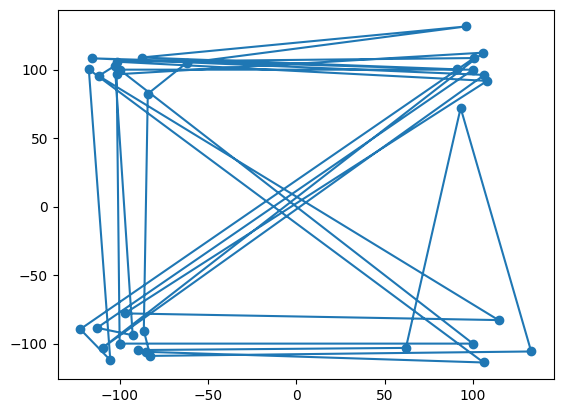

In [7]:
pointsx = []
pointsy = []
for point in points:
    pointsx.append(point[0])
    pointsy.append(point[1])
pointsx.append(pointsx[0])
pointsy.append(pointsy[0])

print(distance())
plt.scatter(pointsx, pointsy)
plt.plot(pointsx, pointsy)
plt.show()

In [ ]:
# ans = solve_como_voyager(points)
# solved_pointsx = []
# solved_pointsy = []
# for i in ans:
#     solved_pointsx.append(points[i][0])
#     solved_pointsy.append(points[i][1])
#
# solved_pointsx.append(solved_pointsx[0])
# solved_pointsy.append(solved_pointsy[0])
#
# print(len(ans))
# print(distance(ans))
#
# plt.scatter(solved_pointsx, solved_pointsy)
# plt.plot(solved_pointsx, solved_pointsy)
# plt.show()

34


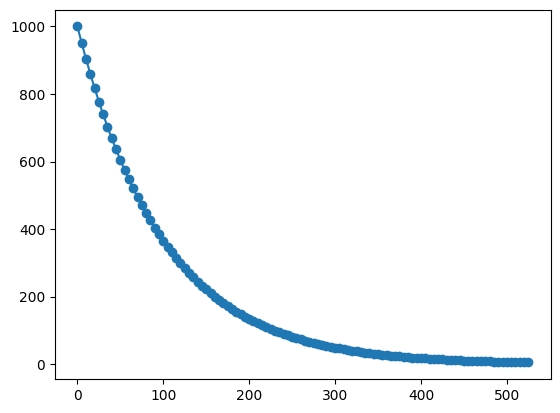

6326.176321387357


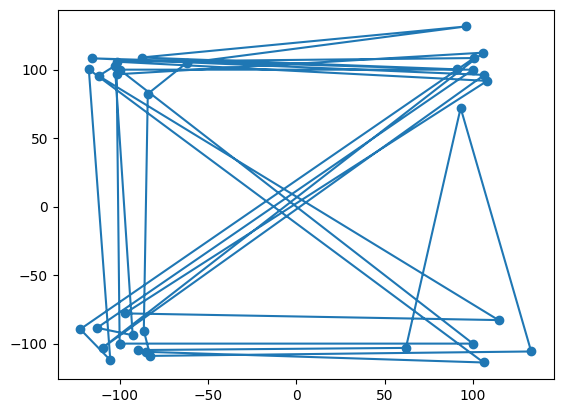

1733.915304224054


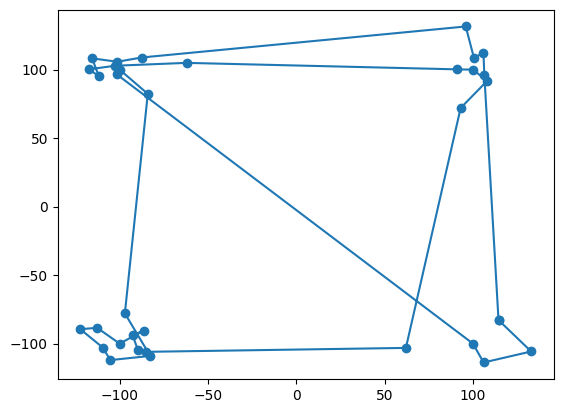

1514.3177193441923


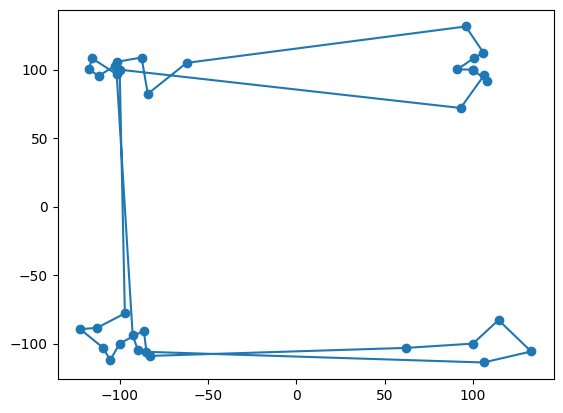

1416.6959746084344


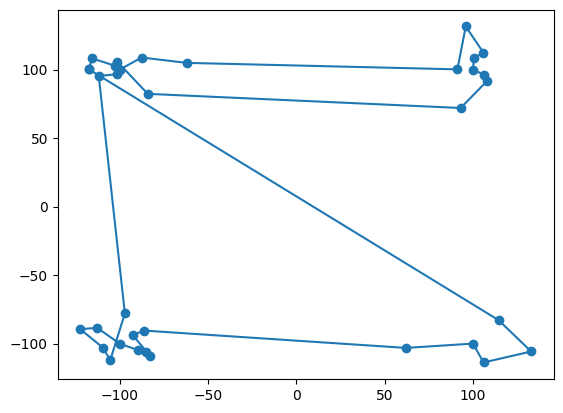

1387.8573701063303


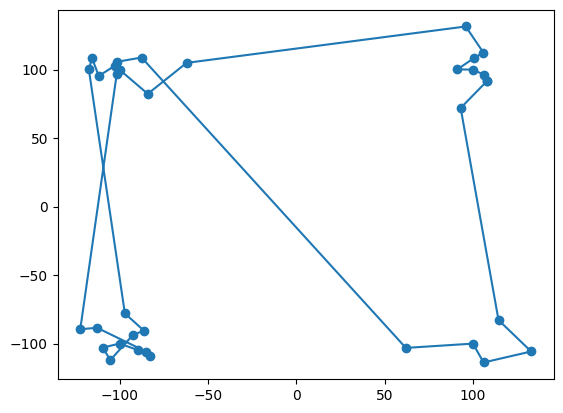

1343.4734290676229


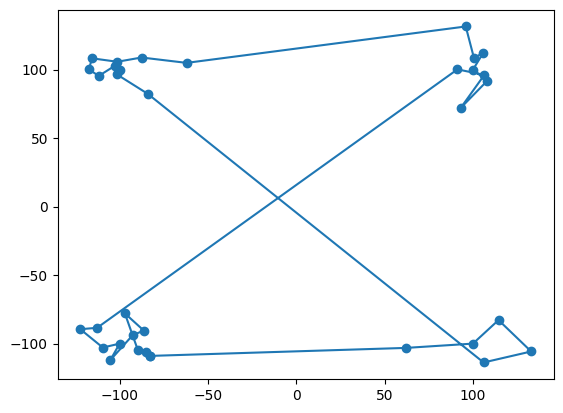

1303.8543732151709


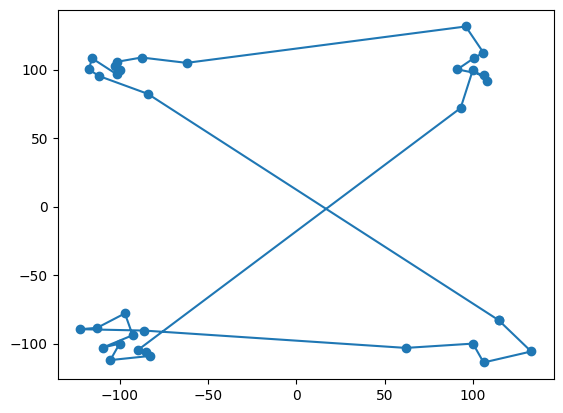

1221.2146338015846


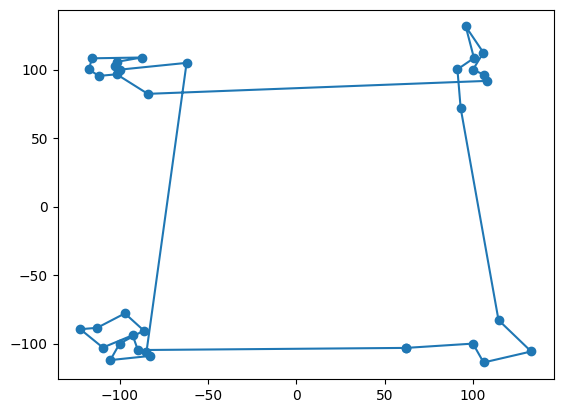

1143.012339505185


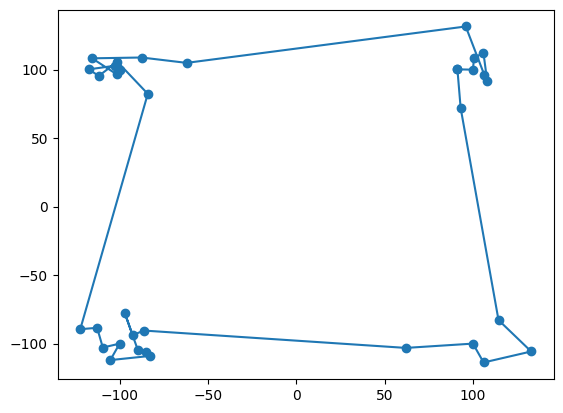

1103.043797032861


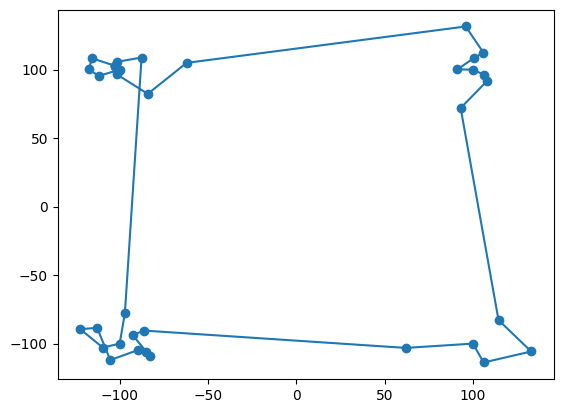

In [8]:
all_answers, temp = solve_como_voyager(points)
tab_px = []
tab_py = []
for ans in all_answers:
    solved_pointsx = []
    solved_pointsy = []
    for i in ans:
        solved_pointsx.append(points[i][0])
        solved_pointsy.append(points[i][1])
    solved_pointsx.append(points[ans[0]][0])
    solved_pointsy.append(points[ans[0]][1])
    tab_px.append(solved_pointsx)
    tab_py.append(solved_pointsy)

solved_pointsx.append(solved_pointsx[0])
solved_pointsy.append(solved_pointsy[0])

print(len(ans))
draw_temp_func(temp)
for i in range(len(tab_px)):
    print(distance(all_answers[i]))
    plt.scatter(tab_px[i], tab_py[i])
    plt.plot(tab_px[i], tab_py[i])
    plt.show()